In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

### Toy lecture example:

In [2]:
X = [[1], [2], [3]]
y = [1, 3, 2]
model = linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
print(f'intercept={b:.3}, slope={w:.3}')

intercept=1.0, slope=0.5


### Simple linear regression (1D x) example:

In [3]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/mtcars.csv', index_col=0)
# df

intercept=37.3, slope=-5.34
R^2 is 0.753
[21.25171145]


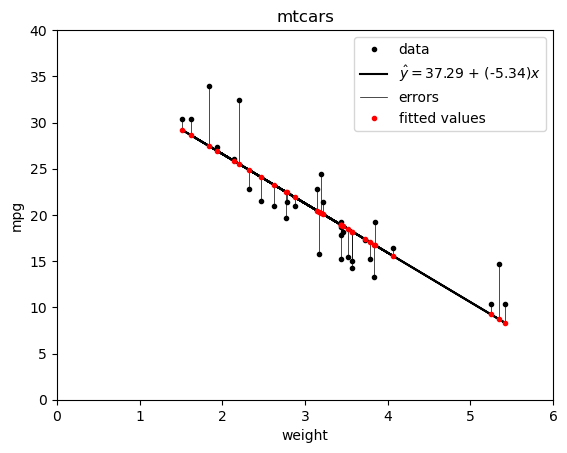

In [4]:
X = df[['wt']]
y = df['mpg']
model = linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
print(f'intercept={b:.3}, slope={w:.3}')
y_hat = model.predict(X) # equivalent to y_hat = w * X[:, 0] + b
x = df.wt # we need a 1D array for plotting (and a 2D array for .fit() above)
plt.plot(x, y, '.', color='black', label='data')
plt.title('mtcars')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.xlim(0, 6)
plt.ylim(0, 40)
# next line: \ and { and } are doubled ('escaped') to get to Latex engine
plt.plot(x, y_hat, color='black',
         label=f'$\\hat{{y}}=${round(b, 2)} + ({round(w, 2)})$x$')
# add vertical lines from (x, y) to (x, y_hat) to show errors:
plt.plot([x, x], [y, y_hat], # [x1, x2], [y1, y2]
         color='black', linewidth=.5, label=None) # label=None prevents duplicate legend entries
plt.plot([], [], color='black', linewidth=.5, label='errors') # add one legend entry

plt.plot(x, y_hat, '.', color='red', label='fitted values')
plt.legend()
print(f'R^2 is {model.score(X, y):.3}') # coefficient of determination
# make a prediction at wt=3
X_new = pd.DataFrame({'wt': [3]})
print(model.predict(X_new))

### Make a multiple regression model (2D x)
of the form mileage = intercept + (slope wt)(weight) + (slope hp)(horsepower)

In [5]:
X = df[['wt', 'hp']]
y = df['mpg']
model.fit(X, y)
print(f'mpg = {model.intercept_:.3} + ({model.coef_[0]:.3})wt + ({model.coef_[1]:.3})hp')
y_hat = model.predict(X) # equivalent to y_hat =
#  model.intercept_ + model.coef_[0] * X[:, 0] + model.coef_[1] * X[:, 1]
print(f'R^2 is {model.score(X, y):.3}') # coefficient of determination
# make a prediction at wt=3, hp=150
model.predict(pd.DataFrame({'wt': [3], 'hp': [150]}))

mpg = 37.2 + (-3.88)wt + (-0.0318)hp
R^2 is 0.827


array([20.82783584])

### Optional: Make 3D plot of multiple regression model

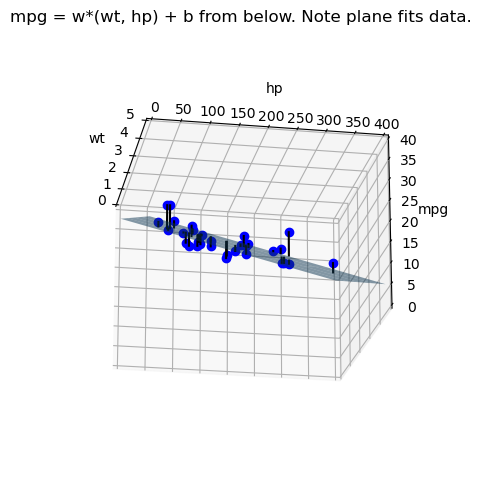

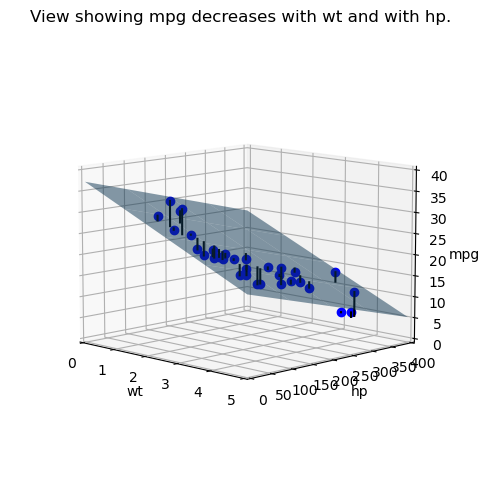

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(df.wt, df.hp, df.mpg, 'ob') # plot data
ax.set_xlabel("wt")
ax.set_ylabel("hp")
ax.set_zlabel("mpg")
ax.set_xlim(0, 5)
ax.set_ylim(0, 400)
ax.set_zlim(0, 40)

def z(x, y): # define a function that gives z from x and y based on the model (y = w * x + b)
    rows, cols = x.shape
    z = np.zeros(x.shape)
    for r in range(rows):
        for c in range(cols):
            z[r, c] = np.sum(model.coef_ * np.array([x[r, c], y[r, c]])) + model.intercept_
    return(z)

x_values_wt = np.linspace(start=0, stop=5, num=5)
y_values_hp = np.linspace(start=0, stop=400, num=5)
x_wt,y_hp = np.meshgrid(x_values_wt, y_values_hp) # make 2D coordinate array from two 1D vectors
z_mpg_plot_hat = z(x_wt, y_hp) # get z coordinate for each 2D point

# https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#surface-plots
ax.plot_surface(X=x_wt, Y=y_hp, Z=z_mpg_plot_hat, alpha=.5)
z_mpg_hat = model.predict(X)
for i in range(df.shape[0]): # plot a vertical line for each error
    ax.plot3D(xs=[df.wt[i], df.wt[i]], ys=[df.hp[i], df.hp[i]], zs=[df.mpg[i], z_mpg_hat[i]], color='black')

ax.set_title('mpg = w*(wt, hp) + b from below. Note plane fits data.')
ax.set_box_aspect(aspect=None, zoom=0.8) # zoom out to see axis labels
#ax.view_init(elev=10, azim=-75) # plane is almost invisible; from above
ax.view_init(elev=-20, azim=-10) # plane is almost invisible; from below
plt.show(block=False)
from IPython.display import display # allows showing figure a second time from another angle, below
ax.set_title('View showing mpg decreases with wt and with hp.')
ax.view_init(elev=10, azim=-45)
display(fig) # show second view of plot